# Smartphone Price Prediction

<img src="https://i.hizliresim.com/142yb9a.png" alt="Image Alt Text">


# We are going to try to predict smartphone prices via implementing deep learning. Let's get started.


<img src="https://i.hizliresim.com/x81791t.png" alt="Im1">


In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import plot,iplot,download_plotlyjs,init_notebook_mode
import cufflinks as cf
import plotly.express as px

In [42]:
init_notebook_mode(connected=True)
cf.go_offline(connected=True)

In [43]:
sp = pd.read_csv('datarepository/smartphones.csv')

In [44]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   avg_rating                 879 non-null    float64
 4   5G_or_not                  980 non-null    int64  
 5   processor_brand            960 non-null    object 
 6   num_cores                  974 non-null    float64
 7   processor_speed            938 non-null    float64
 8   battery_capacity           969 non-null    float64
 9   fast_charging_available    980 non-null    int64  
 10  fast_charging              769 non-null    float64
 11  ram_capacity               980 non-null    int64  
 12  internal_memory            980 non-null    int64  
 13  screen_size                980 non-null    float64

Text(0.5, 1.0, 'NaN Values')

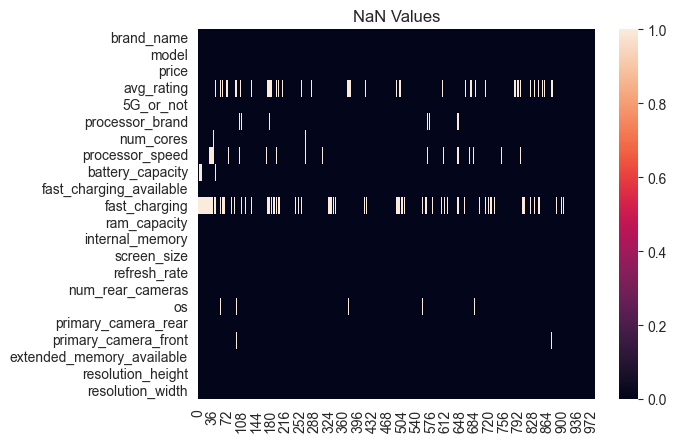

In [45]:
sns.heatmap(sp.isnull().T,cbar='viridis')
plt.title('NaN Values')

In [46]:
sp.head()

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,apple,Apple iPhone 11,38999,7.3,0,bionic,6.0,2.65,3110.0,0,...,64,6.1,60,2,ios,12.0,12.0,0,1792,828
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,bionic,6.0,2.65,3110.0,0,...,128,6.1,60,2,ios,12.0,12.0,0,1792,828
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,bionic,6.0,2.65,3500.0,1,...,64,6.5,60,3,ios,12.0,12.0,0,2688,1242
3,apple,Apple iPhone 12,51999,7.4,1,bionic,6.0,3.10,NaN,0,...,64,6.1,60,2,ios,12.0,12.0,0,2532,1170
4,apple,Apple iPhone 12 (128GB),55999,7.5,1,bionic,6.0,3.10,NaN,0,...,128,6.1,60,2,ios,12.0,12.0,0,2532,1170


In [47]:
brand_counts = sp['brand_name'].value_counts().sort_values(ascending=False)
brand_counts

brand_name
xiaomi       134
samsung      132
vivo         111
realme        97
oppo          88
motorola      52
apple         46
oneplus       42
poco          41
tecno         33
iqoo          32
infinix       29
huawei        16
google        14
honor         13
nokia         13
itel          10
sony           9
asus           7
nubia          6
nothing        5
lava           4
jio            4
micromax       3
ikall          3
oukitel        3
redmi          3
lg             3
gionee         3
letv           3
royole         2
lyf            2
lenovo         2
doogee         2
zte            2
tcl            1
blu            1
vertu          1
tesla          1
cat            1
leeco          1
cola           1
sharp          1
duoqin         1
leitz          1
blackview      1
Name: count, dtype: int64

# In order to obstacle the outliers presence , we create a new variable which includes the datas which smartphone count is higher than five. Otherwise this situation is going to affect our deep learning implementations and visualizations negatively.

In [48]:
brand_counts_higher_than_5 = brand_counts[brand_counts>5]

In [49]:
brand_counts_higher_than_5

brand_name
xiaomi      134
samsung     132
vivo        111
realme       97
oppo         88
motorola     52
apple        46
oneplus      42
poco         41
tecno        33
iqoo         32
infinix      29
huawei       16
google       14
honor        13
nokia        13
itel         10
sony          9
asus          7
nubia         6
Name: count, dtype: int64

# Dropping datas which amount is less than 5 

In [50]:
indexes_bcht5 = sp[~sp['brand_name'].isin(brand_counts_higher_than_5.index)].index.tolist()
len(indexes_bcht5)
for ind in indexes_bcht5:
    sp.drop(index=ind,inplace=True)

C:\Users\burak\AppData\Local\Temp\ipykernel_10440\3280767819.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='price', ylabel='Density'>

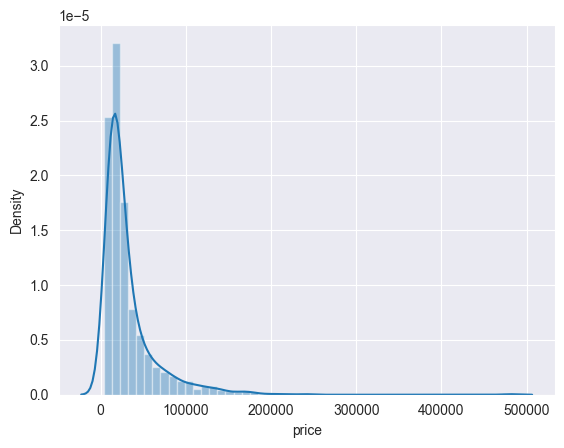

In [51]:
sns.distplot(sp['price'])

Text(0.5, 1.0, 'Count of brands smartphones')

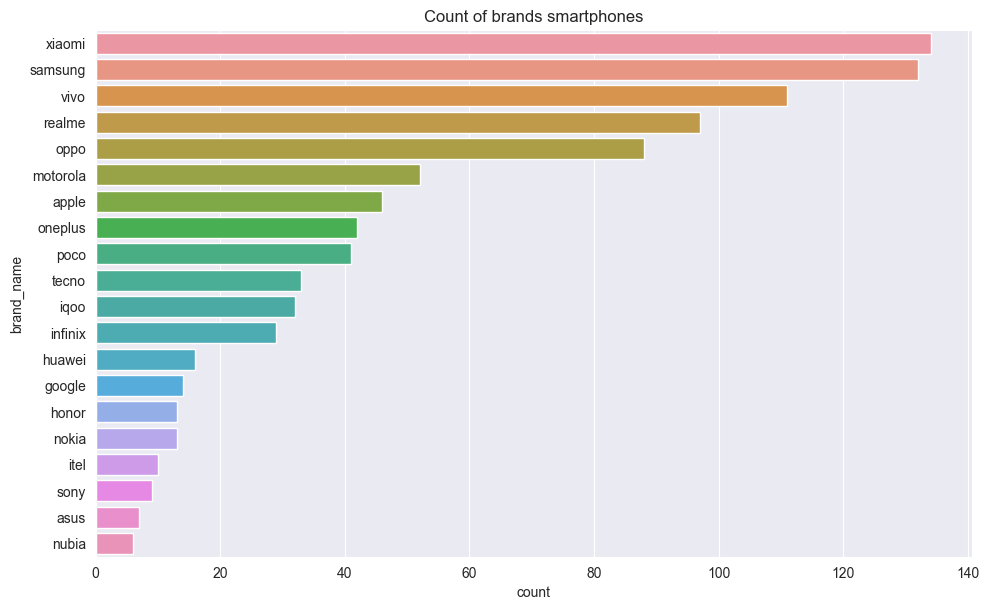

In [52]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
sns.countplot(y='brand_name', data=sp, order=brand_counts_higher_than_5.index)
plt.tight_layout()
plt.title('Count of brands smartphones')

Text(0.5, 1.0, 'Avg. battery capacities of brands smartphones')

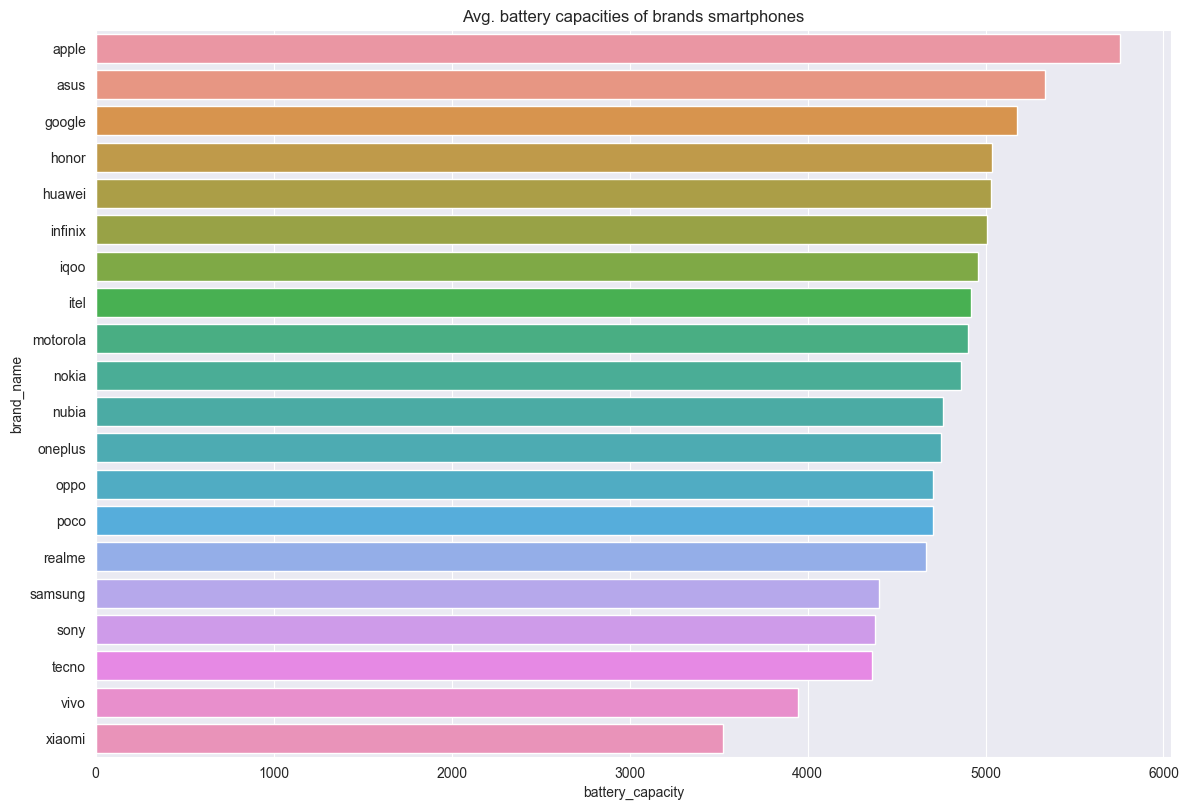

In [53]:
plt.figure(figsize=(12,8))
sns.barplot(x=sp.groupby('brand_name')['battery_capacity'].mean().sort_values(ascending=False),y=sp.groupby('brand_name')['battery_capacity'].mean().index)
plt.tight_layout()
plt.title('Avg. battery capacities of brands smartphones')

Text(0.5, 1.0, 'Avg. processor speed of brands smartphones')

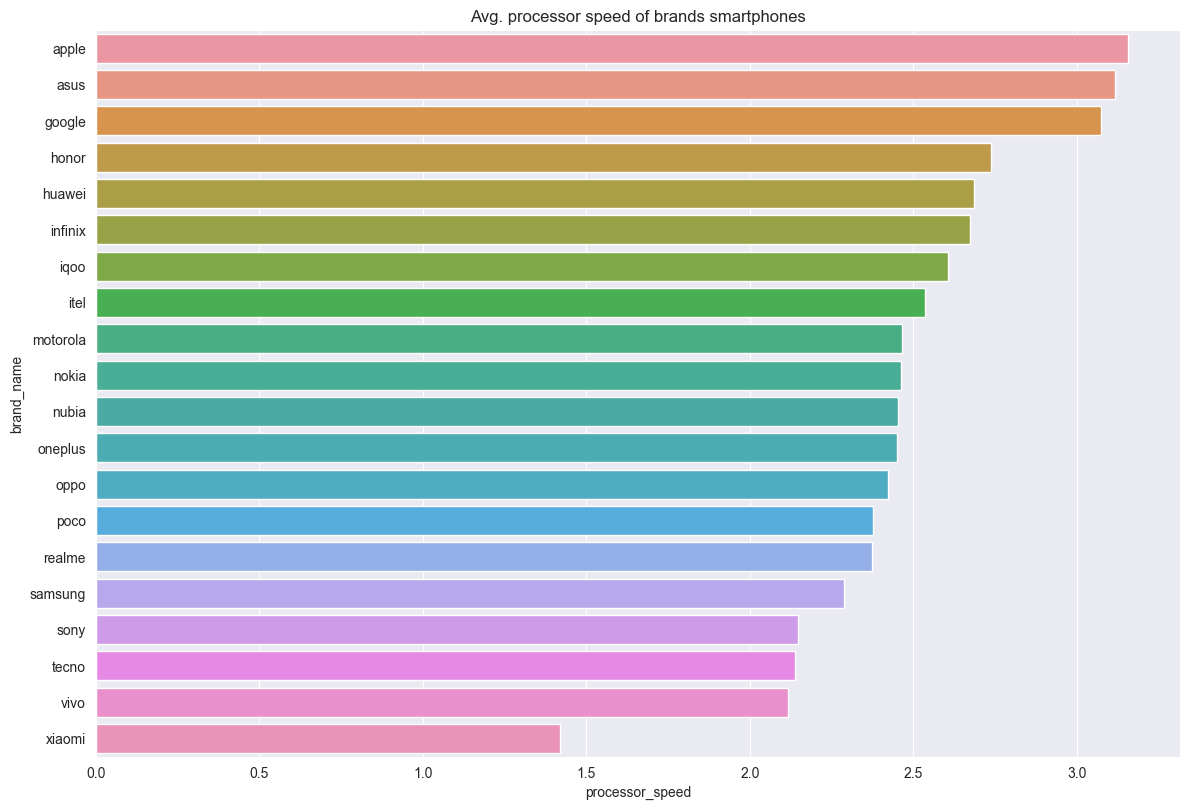

In [54]:
plt.figure(figsize=(12,8))
sns.barplot(x=sp.groupby('brand_name')['processor_speed'].mean().sort_values(ascending=False),y=sp.groupby('brand_name')['processor_speed'].mean().index)
plt.tight_layout()
plt.title('Avg. processor speed of brands smartphones')

Text(0.5, 1.0, 'Avg. price of brands smartphones')

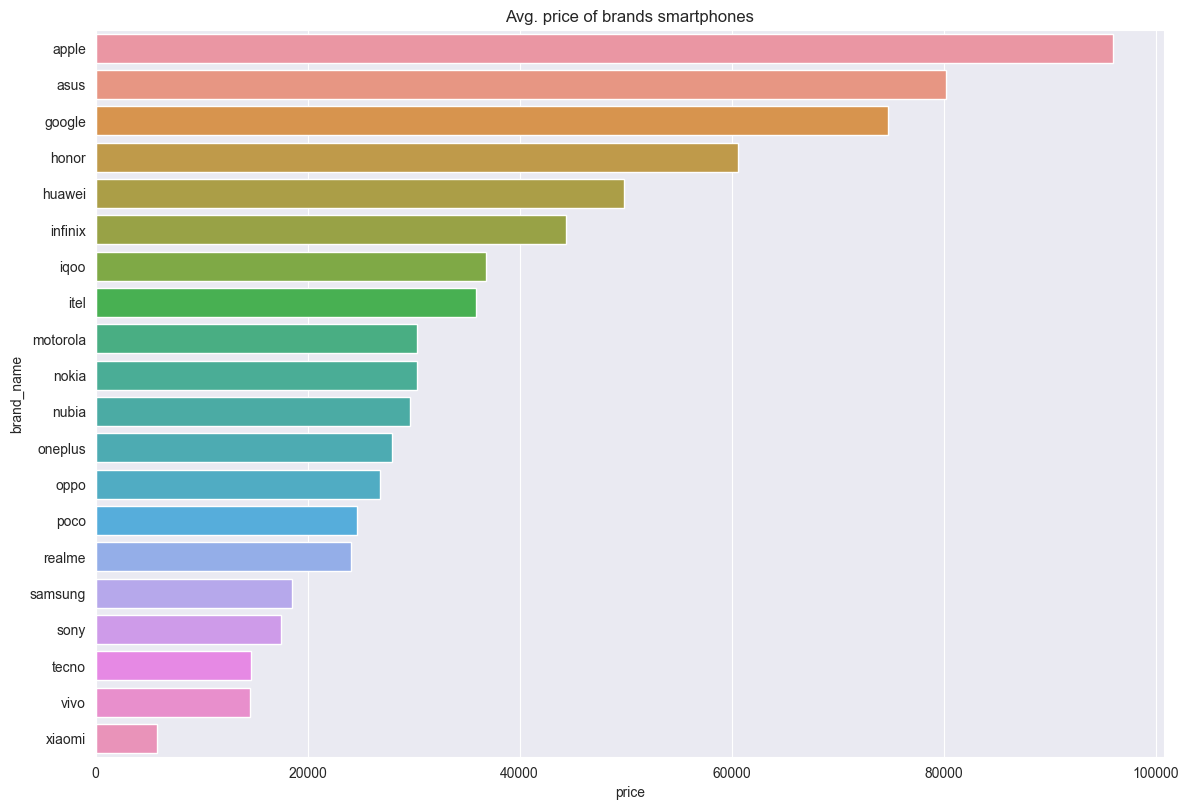

In [55]:
brand_prices = sp.groupby('brand_name')['price'].mean()
plt.figure(figsize=(12,8))
sns.barplot(y=brand_prices.index,x=brand_prices.sort_values(ascending=False))
plt.tight_layout()
plt.title('Avg. price of brands smartphones')

In [56]:
plt.figure(figsize=(12,8))
fig = px.bar(x=sp.groupby('brand_name')['avg_rating'].mean().index, y=sp.groupby('brand_name')['avg_rating'].mean().sort_values(ascending=False), title='Avg. rating of brands smartphones',
             labels={'x': 'Brand Name', 'y': 'Average Rating'})
fig.show()

<Figure size 1200x800 with 0 Axes>

In [57]:
fig = px.pie(values=sp['5G_or_not'].value_counts(),names=sp['5G_or_not'].value_counts().index, title='Distribution of 5G phones')
colors = ['#0074D9', '#FFC300']
fig.update_traces(marker=dict(colors=colors))

fig.show()

In [58]:
fig = px.pie(values=sp['os'].value_counts(),names=sp['os'].value_counts().index, title='Distribution of OS loaded in the smartphones')
colors = ['#006400', '#228B22','#808000']
fig.update_traces(marker=dict(colors=colors))

fig.show()

In [59]:
fig = px.pie(values=sp['processor_brand'].value_counts(),names=sp['processor_brand'].value_counts().index, title='Distribution of OS loaded in the smartphones')
colors = ['#006400', '#228B22','#808000']
fig.update_traces(marker=dict(colors=colors))

fig.show()

# Let's go into Feature Engineering !

<img src="https://i.hizliresim.com/6xty05f.png" alt="Image Alt Text">

# Let's check out NaN values since we dropped some of useless rows.

<Axes: >

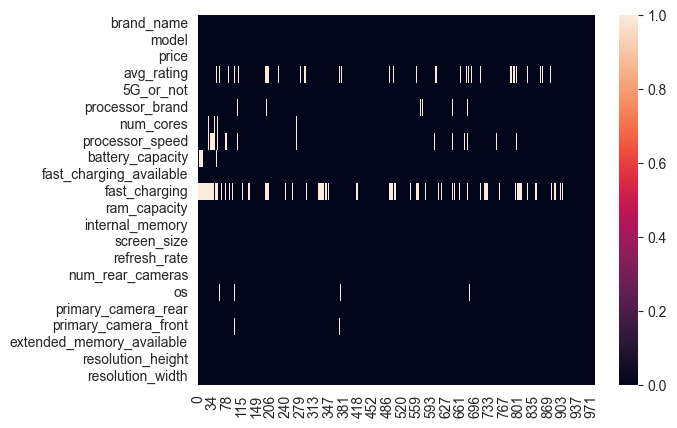

In [60]:
sns.heatmap(sp.isnull().T)
#Still there are too many NaN values especially in fast_charging column as well as avg_rating.

In [61]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 925 entries, 0 to 977
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 925 non-null    object 
 1   model                      925 non-null    object 
 2   price                      925 non-null    int64  
 3   avg_rating                 836 non-null    float64
 4   5G_or_not                  925 non-null    int64  
 5   processor_brand            910 non-null    object 
 6   num_cores                  919 non-null    float64
 7   processor_speed            885 non-null    float64
 8   battery_capacity           914 non-null    float64
 9   fast_charging_available    925 non-null    int64  
 10  fast_charging              745 non-null    float64
 11  ram_capacity               925 non-null    int64  
 12  internal_memory            925 non-null    int64  
 13  screen_size                925 non-null    float64
 14 

# We can apply .fillna() method on avg_rating which are NaN values by applying mean() method based off their brand names.

In [62]:
mean_ratings = sp.groupby('brand_name')['avg_rating'].transform('mean')
sp['avg_rating'] = sp['avg_rating'].fillna(mean_ratings)

<Axes: >

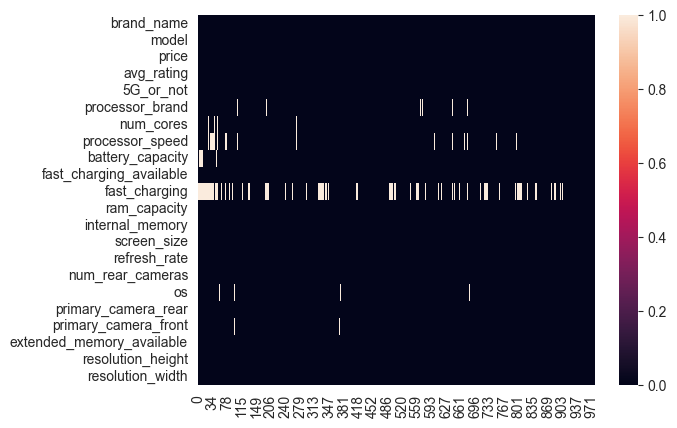

In [63]:
sns.heatmap(sp.isnull().T)

# Fast charging feature with NaN values can be filled by searching on Google however we don't go in-depth feature engineering about it and so we ignore the NaN values and drop them.

In [64]:
sp.dropna(inplace=True)

# Let's perform several applications to categorize the data better and to block overfitting.

In [65]:
def format_resolution(row):
    height = row['resolution_height']
    width = row['resolution_width']
    return f"{height}x{width}"
sp['resolution'] = sp.apply(format_resolution, axis=1)

In [66]:
resolutions = ['2400x1080', '1600x720', '2408x1080','2412x1080']
resdum = sp['resolution'].isin(resolutions)
resdum_df = sp[resdum]
resolution_dummies = pd.get_dummies(resdum_df['resolution'], prefix='resolution')
resolution_dummies = resolution_dummies.astype(int)
processor_brands = ['snapdragon', 'dimensity', 'helio','bionic']
procdum = sp['processor_brand'].isin(processor_brands)
filtered_df = sp[procdum]
processor_dummies = pd.get_dummies(filtered_df['processor_brand'], prefix='processor')
processor_dummies = processor_dummies.astype(int)
internal_memory = [128, 256, 64]
imdum = sp['internal_memory'].isin(internal_memory)
imdum_df = sp[imdum]
internal_memory_dummies = pd.get_dummies(imdum_df['internal_memory'], prefix='internal_memory')
internal_memory_dummies = internal_memory_dummies.astype(int)
num_cores = [8.0]
ncdum = sp['num_cores'].isin(num_cores)
ncdum_df = sp[ncdum]
num_cores_dummies = pd.get_dummies(ncdum_df['num_cores'], prefix='num_cores')
num_cores_dummies = num_cores_dummies.astype(int)
ram_capacity = [8,6,4]
rcdum = sp['ram_capacity'].isin(ram_capacity)
rcdum_df = sp[rcdum]
ram_capacity_dummies = pd.get_dummies(rcdum_df['ram_capacity'], prefix='ram_capacity')
ram_capacity_dummies = ram_capacity_dummies.astype(int)
primary_camera_front = [16.0,8.0,32.0]
pcfdum = sp['primary_camera_front'].isin(primary_camera_front)
pcfdum_df = sp[pcfdum]
primary_camera_front = pd.get_dummies(pcfdum_df['primary_camera_front'], prefix='primary_camera_front')
primary_camera_front_dummies = primary_camera_front.astype(int)
primary_camera_rear = [50.0,64.0,48.0,108.0]
pcrdum = sp['primary_camera_rear'].isin(primary_camera_rear)
pcrdum_df = sp[pcrdum]
primary_camera_rear = pd.get_dummies(pcrdum_df['primary_camera_rear'], prefix='primary_camera_rear')
primary_camera_rear_dummies = primary_camera_rear.astype(int)
primary_camera_rear_dummies
battery_capacity = [5000.0,4500.0,6000.0]
bcdum = sp['battery_capacity'].isin(battery_capacity)
bcdum_df = sp[bcdum]
battery_capacity = pd.get_dummies(bcdum_df['battery_capacity'], prefix='battery_capacity')
battery_capacity_dummies = battery_capacity.astype(int)
num_rear_cameras = [2,3,4]
nrcdum = sp['num_rear_cameras'].isin(num_rear_cameras)
nrcdum_df = sp[nrcdum]
num_rear_cameras = pd.get_dummies(nrcdum_df['num_rear_cameras'], prefix='num_rear_cameras')
num_rear_cameras_dummies = num_rear_cameras.astype(int)


In [67]:
final_data = pd.concat([sp,battery_capacity_dummies,primary_camera_rear_dummies,primary_camera_front_dummies,num_cores_dummies
                       ,ram_capacity_dummies,internal_memory_dummies,processor_dummies
                       ,num_rear_cameras_dummies],axis=1)
final_data.head()

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory_64,internal_memory_128,internal_memory_256,processor_bionic,processor_dimensity,processor_helio,processor_snapdragon,num_rear_cameras_2,num_rear_cameras_3,num_rear_cameras_4
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,bionic,6.0,2.65,3500.0,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
42,apple,Apple iPhone SE 2020,39900,6.3,0,bionic,6.0,2.65,1821.0,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN
46,asus,Asus ROG Phone 5s 5G,39999,8.7,1,snapdragon,8.0,2.90,6000.0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
47,asus,Asus ROG Phone 6,71999,8.6,1,snapdragon,8.0,3.20,6000.0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
48,asus,Asus ROG Phone 6 Batman Edition,72999,8.8,1,dimensity,8.0,3.20,6000.0,1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# We use fillna() to fill NaN values and values are going to be zero since the values to the features belong does not exist in the columns.

In [68]:
final_data.fillna(0,inplace=True)

In [69]:
useless_features = ['brand_name','model','processor_brand','resolution_height','resolution_width','internal_memory','screen_size',
                   'num_rear_cameras','primary_camera_rear','primary_camera_front','os','battery_capacity','ram_capacity','refresh_rate',
                   'resolution','num_cores']

In [70]:
final_data.drop(columns=useless_features,inplace=True)

In [71]:
final_data.columns

Index(['price', 'avg_rating', '5G_or_not', 'processor_speed',
       'fast_charging_available', 'fast_charging', 'extended_memory_available',
       'battery_capacity_4500.0', 'battery_capacity_5000.0',
       'battery_capacity_6000.0', 'primary_camera_rear_48.0',
       'primary_camera_rear_50.0', 'primary_camera_rear_64.0',
       'primary_camera_rear_108.0', 'primary_camera_front_8.0',
       'primary_camera_front_16.0', 'primary_camera_front_32.0',
       'num_cores_8.0', 'ram_capacity_4', 'ram_capacity_6', 'ram_capacity_8',
       'internal_memory_64', 'internal_memory_128', 'internal_memory_256',
       'processor_bionic', 'processor_dimensity', 'processor_helio',
       'processor_snapdragon', 'num_rear_cameras_2', 'num_rear_cameras_3',
       'num_rear_cameras_4'],
      dtype='object')

# We've done with Feature Engineering. We go on the last step which is Deep Learning!

<img src="https://i.hizliresim.com/etgom9t.png" alt="Image Alt Text"> 

In [72]:
X = final_data[final_data['price']<65000].drop('price',axis=1)
y = final_data[final_data['price']<65000]['price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [73]:
X_train.shape

(457, 30)

# Creating a model

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [75]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
4/4 [==============================] - 3s 195ms/step - loss: 722070976.0000 - val_loss: 758109888.0000
Epoch 2/400
4/4 [==============================] - 0s 24ms/step - loss: 722063616.0000 - val_loss: 758102464.0000
Epoch 3/400
4/4 [==============================] - 0s 24ms/step - loss: 722056320.0000 - val_loss: 758094016.0000
Epoch 4/400
4/4 [==============================] - 0s 23ms/step - loss: 722047168.0000 - val_loss: 758082752.0000
Epoch 5/400
4/4 [==============================] - 0s 23ms/step - loss: 722035008.0000 - val_loss: 758067584.0000
Epoch 6/400
4/4 [==============================] - 0s 24ms/step - loss: 722018688.0000 - val_loss: 758046272.0000
Epoch 7/400
4/4 [==============================] - 0s 24ms/step - loss: 721995328.0000 - val_loss: 758016320.0000
Epoch 8/400
4/4 [==============================] - 0s 24ms/step - loss: 721962432.0000 - val_loss: 757975296.0000
Epoch 9/400
4/4 [==============================] - 0s 25ms/step - loss: 721917824.0000 

4/4 [==============================] - 0s 23ms/step - loss: 110332312.0000 - val_loss: 115606000.0000
Epoch 73/400
4/4 [==============================] - 0s 22ms/step - loss: 108922008.0000 - val_loss: 113912608.0000
Epoch 74/400
4/4 [==============================] - 0s 22ms/step - loss: 107624608.0000 - val_loss: 112178168.0000
Epoch 75/400
4/4 [==============================] - 0s 22ms/step - loss: 106233800.0000 - val_loss: 110547816.0000
Epoch 76/400
4/4 [==============================] - 0s 23ms/step - loss: 105017800.0000 - val_loss: 108882160.0000
Epoch 77/400
4/4 [==============================] - 0s 23ms/step - loss: 103728456.0000 - val_loss: 107374848.0000
Epoch 78/400
4/4 [==============================] - 0s 22ms/step - loss: 102467312.0000 - val_loss: 106001536.0000
Epoch 79/400
4/4 [==============================] - 0s 22ms/step - loss: 101245688.0000 - val_loss: 104654616.0000
Epoch 80/400
4/4 [==============================] - 0s 23ms/step - loss: 100097592.0000 - val

4/4 [==============================] - 0s 23ms/step - loss: 60762028.0000 - val_loss: 59927568.0000
Epoch 145/400
4/4 [==============================] - 0s 23ms/step - loss: 60467416.0000 - val_loss: 59727400.0000
Epoch 146/400
4/4 [==============================] - 0s 23ms/step - loss: 60153412.0000 - val_loss: 59528840.0000
Epoch 147/400
4/4 [==============================] - 0s 23ms/step - loss: 59875656.0000 - val_loss: 59330112.0000
Epoch 148/400
4/4 [==============================] - 0s 23ms/step - loss: 59557248.0000 - val_loss: 59050492.0000
Epoch 149/400
4/4 [==============================] - 0s 23ms/step - loss: 59270284.0000 - val_loss: 58764760.0000
Epoch 150/400
4/4 [==============================] - 0s 23ms/step - loss: 58959464.0000 - val_loss: 58578532.0000
Epoch 151/400
4/4 [==============================] - 0s 24ms/step - loss: 58684656.0000 - val_loss: 58381732.0000
Epoch 152/400
4/4 [==============================] - 0s 25ms/step - loss: 58379292.0000 - val_loss: 57

Epoch 216/400
4/4 [==============================] - 0s 24ms/step - loss: 44947984.0000 - val_loss: 49175980.0000
Epoch 217/400
4/4 [==============================] - 0s 23ms/step - loss: 44757804.0000 - val_loss: 49162116.0000
Epoch 218/400
4/4 [==============================] - 0s 23ms/step - loss: 44610584.0000 - val_loss: 49208672.0000
Epoch 219/400
4/4 [==============================] - 0s 24ms/step - loss: 44472104.0000 - val_loss: 49374336.0000
Epoch 220/400
4/4 [==============================] - 0s 23ms/step - loss: 44368844.0000 - val_loss: 49457152.0000
Epoch 221/400
4/4 [==============================] - 0s 23ms/step - loss: 44219236.0000 - val_loss: 49423996.0000
Epoch 222/400
4/4 [==============================] - 0s 23ms/step - loss: 44061912.0000 - val_loss: 49180672.0000
Epoch 223/400
4/4 [==============================] - 0s 23ms/step - loss: 43902084.0000 - val_loss: 48943556.0000
Epoch 224/400
4/4 [==============================] - 0s 23ms/step - loss: 43773172.0000 

Epoch 288/400
4/4 [==============================] - 0s 30ms/step - loss: 37061428.0000 - val_loss: 46575604.0000
Epoch 289/400
4/4 [==============================] - 0s 23ms/step - loss: 37027740.0000 - val_loss: 46385036.0000
Epoch 290/400
4/4 [==============================] - 0s 23ms/step - loss: 36862452.0000 - val_loss: 46393384.0000
Epoch 291/400
4/4 [==============================] - 0s 23ms/step - loss: 36815764.0000 - val_loss: 46446812.0000
Epoch 292/400
4/4 [==============================] - 0s 23ms/step - loss: 36739480.0000 - val_loss: 46298148.0000
Epoch 293/400
4/4 [==============================] - 0s 23ms/step - loss: 36621380.0000 - val_loss: 46287744.0000
Epoch 294/400
4/4 [==============================] - 0s 23ms/step - loss: 36565080.0000 - val_loss: 46273228.0000
Epoch 295/400
4/4 [==============================] - 0s 23ms/step - loss: 36470836.0000 - val_loss: 46246284.0000
Epoch 296/400
4/4 [==============================] - 0s 22ms/step - loss: 36389724.0000 

Epoch 360/400
4/4 [==============================] - 0s 22ms/step - loss: 32295412.0000 - val_loss: 44433736.0000
Epoch 361/400
4/4 [==============================] - 0s 23ms/step - loss: 32296438.0000 - val_loss: 44517120.0000
Epoch 362/400
4/4 [==============================] - 0s 23ms/step - loss: 32195818.0000 - val_loss: 44377760.0000
Epoch 363/400
4/4 [==============================] - 0s 23ms/step - loss: 32130744.0000 - val_loss: 44259796.0000
Epoch 364/400
4/4 [==============================] - 0s 23ms/step - loss: 32077372.0000 - val_loss: 44149200.0000
Epoch 365/400
4/4 [==============================] - 0s 23ms/step - loss: 32051200.0000 - val_loss: 44032868.0000
Epoch 366/400
4/4 [==============================] - 0s 23ms/step - loss: 32037284.0000 - val_loss: 43984616.0000
Epoch 367/400
4/4 [==============================] - 0s 23ms/step - loss: 31967238.0000 - val_loss: 44058192.0000
Epoch 368/400
4/4 [==============================] - 0s 22ms/step - loss: 31907154.0000 

<Axes: >

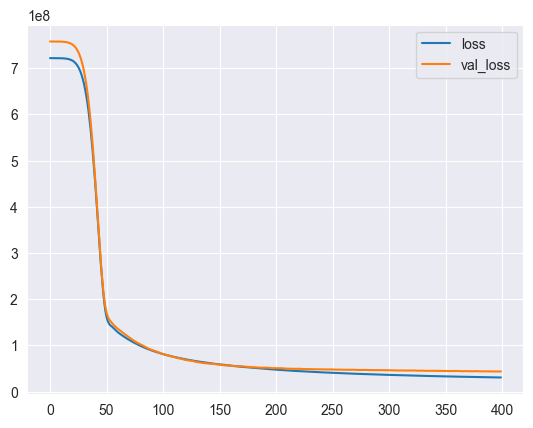

In [76]:
losses = pd.DataFrame(model.history.history)
losses.plot()

# Evaluation on Test Data

In [77]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
predictions = model.predict(X_test)
print('MAE : ' ,mean_absolute_error(y_test,predictions))
print('MSE : ', mean_squared_error(y_test,predictions))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,predictions)))
print('Explained variance score : ' ,explained_variance_score(y_test,predictions))

7/7 [==============================] - 0s 3ms/step
MAE :  4509.96677704632
MSE :  43461793.672977075
RMSE :  6592.555928695416
Explained variance score :  0.751453153902172


# Between 0-50000 price we've done really good job.This model can perform on larger ranges too but not perfectly of course.

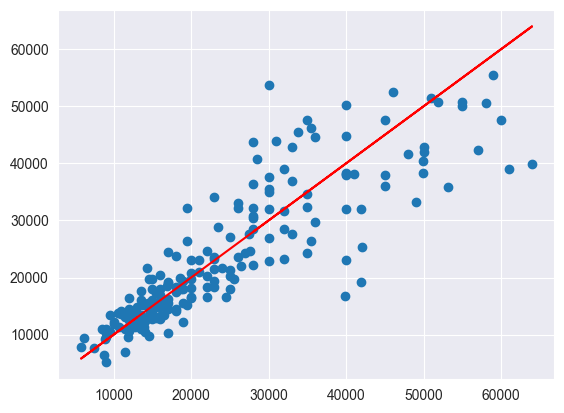

In [78]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

In [79]:
final_data.iloc[33]

price                        21990.0
avg_rating                       8.1
5G_or_not                        0.0
processor_speed                  2.2
fast_charging_available          1.0
fast_charging                   40.0
extended_memory_available        1.0
battery_capacity_4500.0          0.0
battery_capacity_5000.0          0.0
battery_capacity_6000.0          0.0
primary_camera_rear_48.0         1.0
primary_camera_rear_50.0         0.0
primary_camera_rear_64.0         0.0
primary_camera_rear_108.0        0.0
primary_camera_front_8.0         0.0
primary_camera_front_16.0        1.0
primary_camera_front_32.0        0.0
num_cores_8.0                    1.0
ram_capacity_4                   0.0
ram_capacity_6                   0.0
ram_capacity_8                   1.0
internal_memory_64               0.0
internal_memory_128              1.0
internal_memory_256              0.0
processor_bionic                 0.0
processor_dimensity              0.0
processor_helio                  0.0
p

In [80]:
single_phone = final_data.drop('price',axis=1).iloc[33]
single_phone = scaler.transform(single_phone.values.reshape(-1, 30))
model.predict(single_phone)

1/1 [==============================] - 0s 41ms/step


C:\Users\burak\anaconda3\envs\mytfenv\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



array([[18491.432]], dtype=float32)

# Thank you for your interest in my project.
